<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Encoding:" data-toc-modified-id="Encoding:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Encoding:</a></span><ul class="toc-item"><li><span><a href="#count-encoder:" data-toc-modified-id="count-encoder:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>count encoder:</a></span></li><li><span><a href="#Count-encoder" data-toc-modified-id="Count-encoder-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Count encoder</a></span></li><li><span><a href="#OneHotEncoder:" data-toc-modified-id="OneHotEncoder:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>OneHotEncoder:</a></span></li><li><span><a href="#Ordinal-Encoding:" data-toc-modified-id="Ordinal-Encoding:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Ordinal Encoding:</a></span></li></ul></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model building</a></span></li></ul></div>

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Import dataset

In [2]:
df= pd.read_csv('dataset.csv.zip')
df

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
1,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
3,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
4,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85795,2015,USM,Median of all states,BRFSS,None,None,Healthy People 2020,None,Risk Factors,Hypertension,...,Race,Non-Hispanic Asian,C2,T9,BR012,AgeStdz,BOC04,RAC03,58,NaN
85796,2015,USM,Median of all states,BRFSS,None,None,Healthy People 2020,None,Risk Factors,Hypertension,...,Race,Hispanic,C2,T9,BR012,AgeStdz,BOC04,RAC04,58,NaN
85797,2015,USM,Median of all states,BRFSS,None,None,Healthy People 2020,None,Risk Factors,Hypertension,...,Race,Hispanic,C2,T9,BR012,Crude,BOC04,RAC04,58,NaN
85798,2015,USM,Median of all states,BRFSS,None,None,Healthy People 2020,None,Risk Factors,Hypertension,...,Race,Other,C2,T9,BR012,Crude,BOC04,RAC07,58,NaN


## Feature engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85800 entries, 0 to 85799
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        85800 non-null  int64  
 1   LocationAbbr                85800 non-null  object 
 2   LocationDesc                85800 non-null  object 
 3   Datasource                  85800 non-null  object 
 4   PriorityArea1               85800 non-null  object 
 5   PriorityArea2               85800 non-null  object 
 6   PriorityArea3               85800 non-null  object 
 7   PriorityArea4               85800 non-null  object 
 8   Category                    85800 non-null  object 
 9   Topic                       85800 non-null  object 
 10  Indicator                   85800 non-null  object 
 11  Data_Value_Type             85800 non-null  object 
 12  Data_Value_Unit             85800 non-null  object 
 13  Data_Value                  570

In [4]:
#Checking null values
df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                    28768
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    57032
Data_Value_Footnote           57032
Confidence_Limit_Low          30167
Confidence_Limit_High         30167
Break_Out_Category                0
Break_out                         0
CategoryID                        0
TopicID                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakoutCategoryID                0
BreakOutID                        0
LocationID                  

In [5]:
df.axes

[RangeIndex(start=0, stop=85800, step=1),
 Index(['Year', 'LocationAbbr', 'LocationDesc', 'Datasource', 'PriorityArea1',
        'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
        'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
        'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
        'Confidence_Limit_Low', 'Confidence_Limit_High', 'Break_Out_Category',
        'Break_out', 'CategoryID', 'TopicID', 'IndicatorID',
        'Data_Value_TypeID', 'BreakoutCategoryID', 'BreakOutID', 'LocationID',
        'GeoLocation'],
       dtype='object')]

In [6]:
df.head(3)

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
1,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"


In [7]:
# filling null values

In [8]:
df['Data_Value'].isna().sum()

28768

In [9]:
mean= df['Data_Value'].mean()
df['Data_Value']= df['Data_Value'].fillna(mean)

In [10]:
df['Data_Value_Unit'].unique()

array(['Percent (%)'], dtype=object)

In [11]:
#drop 'Data_Value_Unit' 
df.drop('Data_Value_Unit',axis=1,inplace=True)

In [12]:
df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value                        0
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    57032
Data_Value_Footnote           57032
Confidence_Limit_Low          30167
Confidence_Limit_High         30167
Break_Out_Category                0
Break_out                         0
CategoryID                        0
TopicID                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakoutCategoryID                0
BreakOutID                        0
LocationID                        0
GeoLocation                 

In [13]:
df['Confidence_Limit_Low'].mean()

30.503186957381704

In [14]:
mean= df['Confidence_Limit_Low'].mean()
df['Confidence_Limit_Low']= df['Confidence_Limit_Low'].fillna(mean)

In [15]:
df['Confidence_Limit_High'].mean()

36.873832078083

In [16]:
mean= df['Confidence_Limit_High'].mean()
df['Confidence_Limit_High']= df['Confidence_Limit_Low'].fillna(mean)

In [17]:
df['Data_Value_Footnote_Symbol'].unique()

array([nan, '~', '-'], dtype=object)

In [18]:
 df.drop('Data_Value_Footnote_Symbol',axis=1,inplace=True)

In [19]:
df['Data_Value_Footnote'].unique()

array([nan,
       'Statistically unstable estimates not presented [unstable by CDC standards: (standard error/estimate>0.30)]',
       'Data not available'], dtype=object)

In [20]:
df.drop(["Data_Value_Footnote"], axis=1, inplace=True)

In [21]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [22]:
style.use("ggplot")

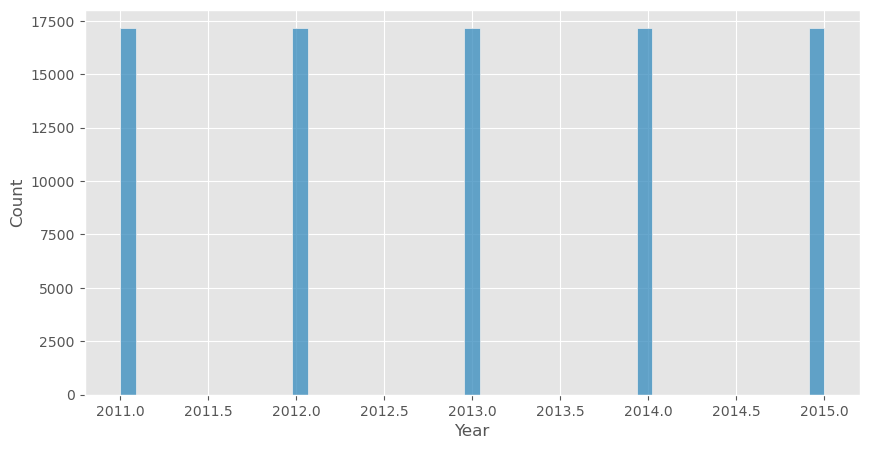

In [23]:
for i in ['Year']:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i])
    plt.show()

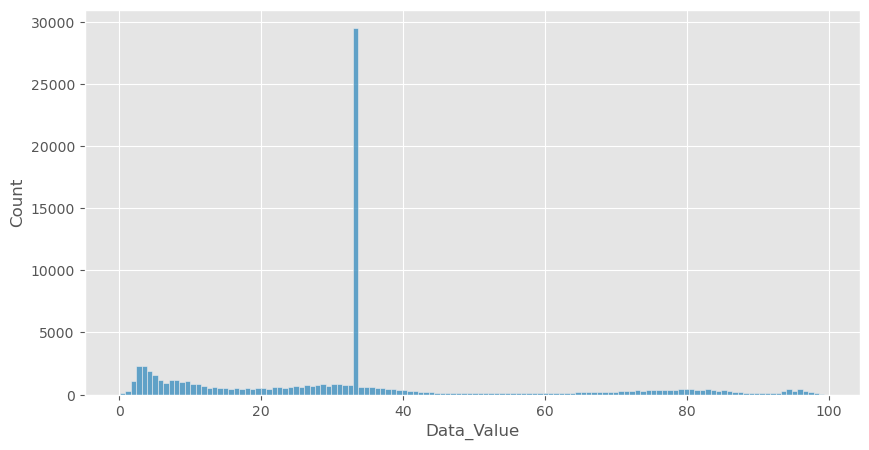

In [24]:
for i in ['Data_Value']:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i])
    plt.show()

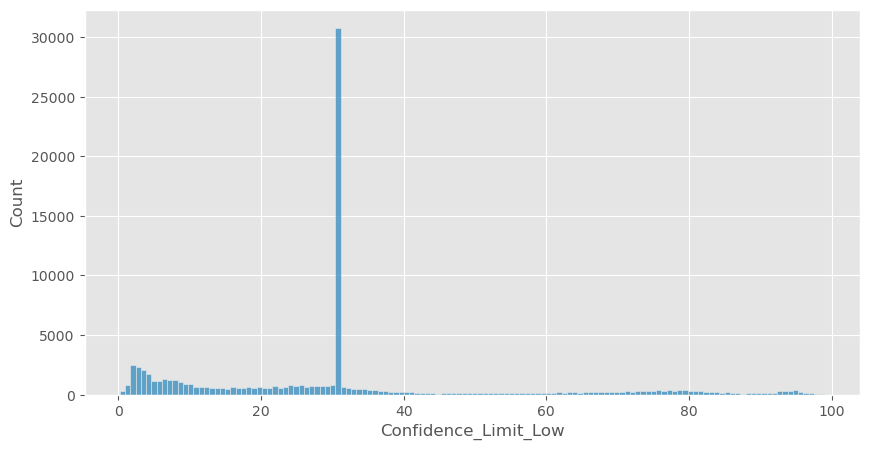

In [25]:
for i in ['Confidence_Limit_Low']:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i])
    plt.show()

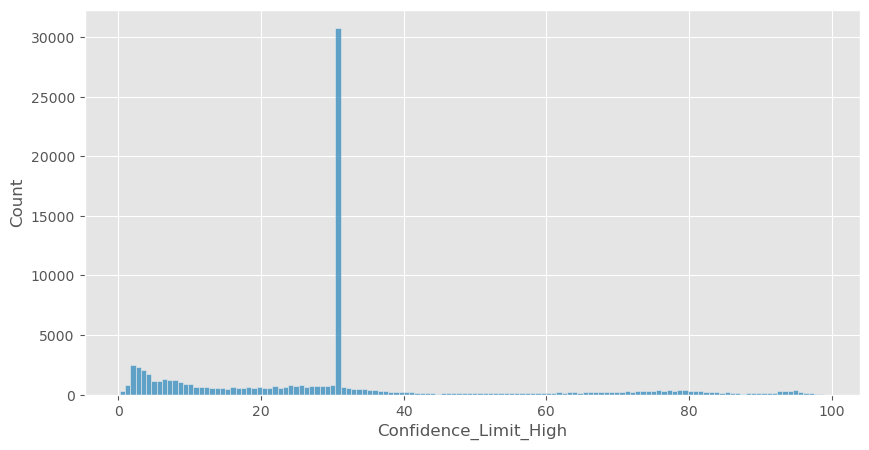

In [26]:
for i in ['Confidence_Limit_High']:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i])
    plt.show()

## Encoding:

### count encoder:

In [27]:
## Now encode all categorical features using sutaible encoding techniques

### Count encoder

In [28]:
from category_encoders import CountEncoder

In [29]:
df['Break_Out_Category'].unique()

array(['Overall', 'Gender', 'Age', 'Race'], dtype=object)

In [30]:
df['Break_Out_Category'].value_counts()

Race       39000
Age        23400
Gender     15600
Overall     7800
Name: Break_Out_Category, dtype: int64

In [31]:
df['BreakoutCategoryID'].unique()

array(['BOC01', 'BOC02', 'BOC03', 'BOC04'], dtype=object)

In [32]:
df['BreakoutCategoryID'].value_counts()

BOC04    39000
BOC03    23400
BOC02    15600
BOC01     7800
Name: BreakoutCategoryID, dtype: int64

In [33]:
count_enc= CountEncoder(normalize=True,cols=['Break_Out_Category','BreakoutCategoryID'])
df= count_enc.fit_transform(df)

### OneHotEncoder:

In [34]:
df['LocationAbbr'].value_counts()

AL     1650
AK     1650
NE     1650
NV     1650
NH     1650
NJ     1650
NM     1650
NY     1650
NC     1650
ND     1650
OH     1650
OK     1650
OR     1650
PA     1650
RI     1650
SC     1650
SD     1650
TN     1650
TX     1650
UT     1650
VT     1650
VA     1650
WA     1650
WV     1650
WI     1650
MT     1650
MO     1650
MS     1650
HI     1650
AZ     1650
AR     1650
CA     1650
CO     1650
CT     1650
DE     1650
USM    1650
DC     1650
FL     1650
GA     1650
ID     1650
MN     1650
IL     1650
IN     1650
IA     1650
KS     1650
KY     1650
LA     1650
ME     1650
MD     1650
MA     1650
MI     1650
WY     1650
Name: LocationAbbr, dtype: int64

In [35]:
df['Datasource'].unique()

array(['BRFSS'], dtype=object)

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
df= pd.get_dummies(df,columns=['LocationAbbr','Datasource'])

### Ordinal Encoding:

In [38]:
df['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Median of all states',
       'Washington, DC', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [39]:
df['Topic'].unique()

array(['Major Cardiovascular Disease', 'Stroke', 'Diabetes',
       'Acute Myocardial Infarction (Heart Attack)',
       'Coronary Heart Disease', 'Cholesterol Abnormalities', 'Nutrition',
       'Obesity', 'Smoking', 'Physical Inactivity', 'Hypertension'],
      dtype=object)

In [40]:
df['Topic'].value_counts()

Acute Myocardial Infarction (Heart Attack)    11440
Cholesterol Abnormalities                     11440
Obesity                                       11440
Hypertension                                  11440
Major Cardiovascular Disease                   5720
Stroke                                         5720
Diabetes                                       5720
Coronary Heart Disease                         5720
Nutrition                                      5720
Smoking                                        5720
Physical Inactivity                            5720
Name: Topic, dtype: int64

In [41]:
from category_encoders import OrdinalEncoder

In [42]:
ord_enc=OrdinalEncoder(cols=['LocationDesc','Topic'])
df=ord_enc.fit_transform(df)

In [43]:
df['PriorityArea1'].unique()

array(['None', 'Million Hearts'], dtype=object)

In [44]:
df['PriorityArea2'].unique()

array(['None', 'ABCS'], dtype=object)

In [45]:
df['PriorityArea3'].unique()

array(['None', 'Healthy People 2020'], dtype=object)

In [46]:
df['PriorityArea4'].unique()

array(['None'], dtype=object)

In [47]:
col= ['PriorityArea1','PriorityArea2','PriorityArea3','PriorityArea4']
df.drop(col,axis=1,inplace=True)

In [48]:
df["Indicator"].value_counts()

Prevalence of major cardiovascular disease among US adults (18+); BRFSS                                  5720
Prevalence of stroke among US adults (18+); BRFSS                                                        5720
Prevalence of diabetes among US adults (18+); BRFSS                                                      5720
Prevalence of acute myocardial infarction (heart attack) among US adults (18+); BRFSS                    5720
Prevalence of coronary heart disease among US adults (18+); BRFSS                                        5720
Prevalence of post-hospitalization rehabilitation among heart attack patients, US adults (18+); BRFSS    5720
Prevalence of cholesterol screening in the past 5 years among US adults (20+); BRFSS                     5720
Prevalence of high total cholesterol among US adults (20+); BRFSS                                        5720
Prevalence of consuming fruits and vegetables less than 5 times per day among US adults (18+); BRFSS     5720
Prevalence

In [49]:
df["Data_Value_Type"]

0        Age-Standardized
1                   Crude
2                   Crude
3        Age-Standardized
4        Age-Standardized
               ...       
85795    Age-Standardized
85796    Age-Standardized
85797               Crude
85798               Crude
85799    Age-Standardized
Name: Data_Value_Type, Length: 85800, dtype: object

In [50]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["Data_Value_Type"]= label_encoder.fit_transform(df['Data_Value_Type'])
df['Data_Value_Type'].unique()

array([0, 1])

In [51]:
df["Data_Value_TypeID"].value_counts()

Crude      54600
AgeStdz    31200
Name: Data_Value_TypeID, dtype: int64

In [52]:
df["GeoLocation"].value_counts()

(32.84057112200048, -86.63186076199969)      1650
(40.79373015200048, -77.86070029399963)      1650
(39.493240390000494, -117.07184056399967)    1650
(43.65595011300047, -71.50036091999965)      1650
(40.13057004800049, -74.27369128799967)      1650
(34.52088095200048, -106.24058098499967)     1650
(42.82700103200045, -75.54397042699964)      1650
(35.466220975000454, -79.15925046299964)     1650
(47.47531977900047, -100.11842104899966)     1650
(40.06021014100048, -82.40426005599966)      1650
(35.47203135600046, -97.52107021399968)      1650
(44.56744942400047, -120.15503132599969)     1650
(41.70828019300046, -71.52247031399963)      1650
(47.06652897200047, -109.42442064499971)     1650
(33.998821303000454, -81.04537120699968)     1650
(44.353130053000484, -100.3735306369997)     1650
(35.68094058000048, -85.77449091399967)      1650
(31.827240407000488, -99.42677020599967)     1650
(39.360700171000474, -111.58713063499971)    1650
(43.62538123900049, -72.51764079099962)      1650


In [53]:
df["Break_out"].value_counts()

Overall               7800
Male                  7800
Female                7800
Non-Hispanic White    7800
Non-Hispanic Black    7800
Non-Hispanic Asian    7800
Hispanic              7800
Other                 7800
25-44                 3900
45-64                 3900
65+                   3900
35+                   3900
75+                   3900
18-24                 2860
20-24                 1040
Name: Break_out, dtype: int64

In [54]:
df["BreakOutID"].value_counts()

OVR01    7800
GEN01    7800
GEN02    7800
RAC01    7800
RAC02    7800
RAC03    7800
RAC04    7800
RAC07    7800
AGE04    3900
AGE05    3900
AGE06    3900
AGE07    3900
AGE08    3900
AGE01    2860
AGE02    1040
Name: BreakOutID, dtype: int64

In [55]:
df["IndicatorID"].value_counts()

BR001    5720
BR005    5720
BR016    5720
BR003    5720
BR002    5720
BR004    5720
BR013    5720
BR014    5720
BR020    5720
BR019    5720
BR021    5720
BR017    5720
BR018    5720
BR011    5720
BR012    5720
Name: IndicatorID, dtype: int64

In [56]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['CategoryID','TopicID','Indicator','Data_Value_TypeID','GeoLocation','Break_out','BreakOutID','IndicatorID'])
df=ordenc.fit_transform(df)

In [57]:
df["Data_Value_TypeID"].value_counts()

2    54600
1    31200
Name: Data_Value_TypeID, dtype: int64

In [58]:
df["Category"].value_counts()

Risk Factors               57200
Cardiovascular Diseases    28600
Name: Category, dtype: int64

In [59]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["Category"]= label_encoder.fit_transform(df['Category'])
df['Category'].unique()

array([0, 1])

In [60]:
df["Category"].unique()

array([0, 1])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85800 entries, 0 to 85799
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   85800 non-null  int64  
 1   LocationDesc           85800 non-null  int32  
 2   Category               85800 non-null  int32  
 3   Topic                  85800 non-null  int32  
 4   Indicator              85800 non-null  int32  
 5   Data_Value_Type        85800 non-null  int32  
 6   Data_Value             85800 non-null  float64
 7   Data_Value_Alt         85800 non-null  float64
 8   Confidence_Limit_Low   85800 non-null  float64
 9   Confidence_Limit_High  85800 non-null  float64
 10  Break_Out_Category     85800 non-null  float64
 11  Break_out              85800 non-null  int32  
 12  CategoryID             85800 non-null  int32  
 13  TopicID                85800 non-null  int32  
 14  IndicatorID            85800 non-null  int32  
 15  Da

## Model building

In [66]:
x = df.drop('Topic',axis=1)
y = df["Topic"]

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)

In [68]:
from sklearn.tree import DecisionTreeClassifier
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
y_pred= DT_model.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,mean_squared_error

In [70]:
accuracy_score(y_test,y_pred)

1.0

In [71]:
mean_squared_error(y_test,y_pred)

0.0

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# ypred = gnb.fit(x_train, y_train).predict(x_test)
# ypred

In [ ]:
# accuracy_score(y_test,y_pred)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf_model= RandomForestClassifier()
# rf_model.fit(x_train,y_train)
# y_pred= rf_model.predict(x_test)
# y_pred

In [ ]:
# accuracy_score(y_test,y_pred)